In [2]:
# Testing Analysis Project

# Step 1 Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest


In [3]:
# Step 2 Generate Random A/B Test Data
np.random.seed(42)

n_A = 5000  # sample size for group A
n_B = 5000  # sample size for group B

# Simulate conversion outcomes (0 = no, 1 = yes)
conv_rate_A = 0.12  # baseline conversion rate
conv_rate_B = 0.14  # higher conversion rate (test version)

group_A = np.random.binomial(1, conv_rate_A, n_A)
group_B = np.random.binomial(1, conv_rate_B, n_B)

# Combine into DataFrame
data = pd.DataFrame({
    'user_id': range(1, n_A + n_B + 1),
    'group': ['A'] * n_A + ['B'] * n_B,
    'converted': np.concatenate([group_A, group_B])
})


In [6]:
# Step 3: Explore Data
print("\n✅ Basic Info:\n", data.groupby('group')['converted'].agg(['mean','std', 'count', 'sum']))



✅ Basic Info:
          mean       std  count  sum
group                              
A      0.1156  0.319777   5000  578
B      0.1326  0.339176   5000  663


C:\Users\aajjm\AppData\Local\Temp\ipykernel_12368\648985776.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data, x='group', y='converted', ci=95)


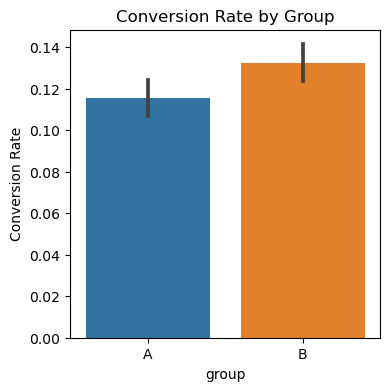

In [9]:
# Step 4: Visualization
plt.figure(figsize=(4,4))
sns.barplot(data=data, x='group', y='converted', ci=95)
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.show()



In [11]:
# Step 5: Hypothesis Testing - Proportion Z-Test
# H0: p_A = p_B
# H1: p_A ≠ p_B

success = data.groupby('group')['converted'].sum().values
nobs = data.groupby('group')['converted'].count().values

z_stat, p_val = proportions_ztest(count=success, nobs=nobs, alternative='two-sided')

print(f"\n🧪 Z-test result:")
print(f"Z-statistic = {z_stat:.2f}")
print(f"P-value     = {p_val:.2f}")
""" Since P-value is less than 0.05 it means that H0 is true 
"""


🧪 Z-test result:
Z-statistic = -2.58
P-value     = 0.01


In [14]:
# Step 6: Confidence Intervals for Conversion Rates
from statsmodels.stats.api import proportion_confint

confint_A = proportion_confint(count=success[0], nobs=nobs[0], alpha=0.05, method='normal')
confint_B = proportion_confint(count=success[1], nobs=nobs[1], alpha=0.05, method='normal')

print("\n📊 Confidence Intervals:")
print(f"Group A: {confint_A}")
print(f"Group B: {confint_B}")



📊 Confidence Intervals:
Group A: (0.10673729338716292, 0.12446270661283707)
Group B: (0.12319963839919024, 0.14200036160080975)


In [16]:
# Step 7: Calculate Effect Size (Cohen's h)
def cohens_h(p1, p2):
    return 2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2)))

p1 = success[0] / nobs[0]
p2 = success[1] / nobs[1]
effect_size = cohens_h(p1, p2)

print(f"\n Effect Size (Cohen's h): {effect_size:.4f}")




 Effect Size (Cohen's h): -0.0516


In [19]:
# Step 8: Conclusion
if p_val < 0.05:
    print("\n Result: Statistically significant difference detected.")
else:
    print("\n Result: No statistically significant difference detected.")



 Result: Statistically significant difference detected.
